In [1]:
import mglearn
import sklearn
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from mlxtend.classifier import Adaline
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import expit

SKLearn provides the class Perceptron in the module linear_models.
The main parameter, i.e. the learning rate, is denoted by the parameter eta0.
The weights of the model can be retrieved by the attribute coef_ and the bias is available by the attribute intercept_.

In [2]:
X, y = iris_data()
X = X[:, [0, 3]] # sepal length and pedal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

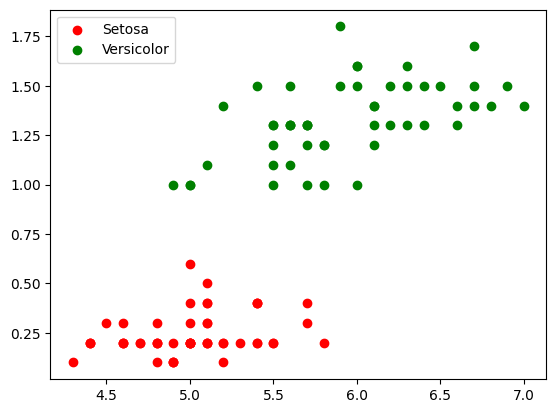

In [3]:
fig, ax = plt.subplots()
colours = ['red', 'green']
labels = ['Setosa', 'Versicolor']
for i in [0, 1]:
    ax.scatter(X[y == i, 0], X[y == i, 1], color=colours[i], label=labels[i])
ax.legend()

Depending on the random part of the algorithm, the boundary (i.e. the output) can be different when running the algorithm. Because in this case, for example, there can be different boundaries drawn. If the classes are Linearly Separable, then for sure there is a line.

In [4]:
clf_per = Perceptron()
clf_per.fit(X, y)

Perceptron()

<Axes: >

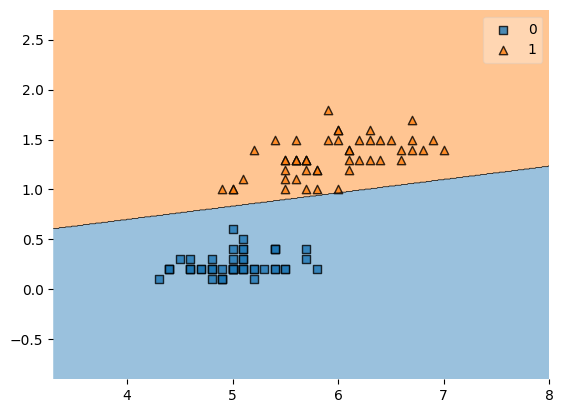

In [5]:
fig, ax = plt.subplots()
plot_decision_regions(X, y, clf=clf_per, ax=ax)

Line is very close to class 1, but still it works)
Perceptron is able to identify a line which separates two classes and use this line to discriminate between them.

## Adaline

In [ ]:
class AdalineGD:
    """
    ADAptive LInear NEuron classifier.
    Implementation of algorithm.

    Parameters:
        eta: float - learning rate between 0 and 1
        epochs: int -  number of epochs/iterations
        random_state: int - random number generator seed for random weight initialization

    Attributes:
        w_: 1d-array - weights after fitting
        b_: scalar - bias unit after fitting
        losses_: list - mean squarred error loss function values in each epochs
    """

    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        :param X: training vectors, matrix shape = [n_example, n_features]
        :param y: target values, vector of shape = [n_examples]
        :return: object
        """
        rgen = np.random.default_rng(seed = self.random_state)

        # weights and bias initialization
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = rgen.normal(loc=0.0, scale=0.01)
        self.losses_ = []

        # core of the adaline
        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * np.mean(errors)

            loss = (errors**2).sum()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate the net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Iteration: 30/30 | Cost 3.79 | Elapsed: 0:00:00 | ETA: 0:00:0000

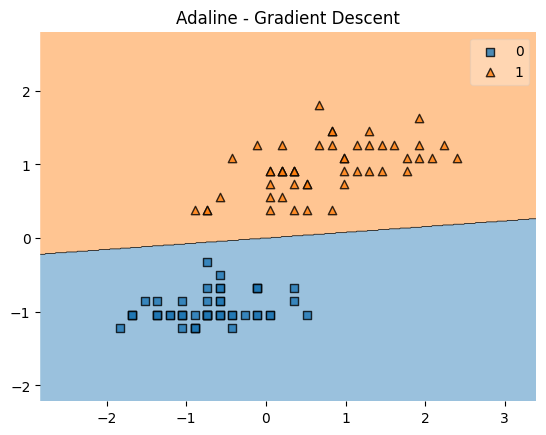

Text(0, 0.5, 'Cost')

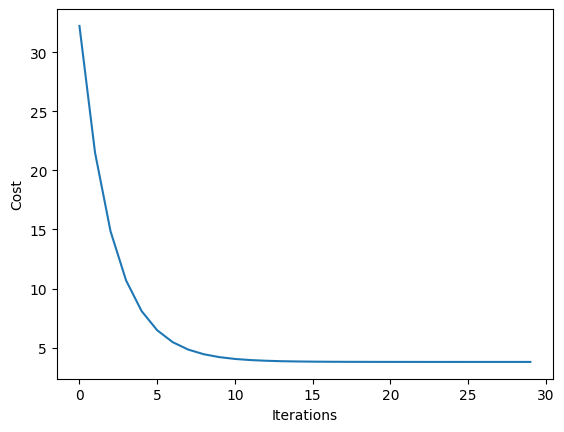

In [6]:
X_scaled = StandardScaler().fit_transform(X)

ada = Adaline(epochs=30,
              eta=0.01,
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_scaled, y)
plot_decision_regions(X_scaled, y, clf=ada)
plt.title("Adaline - Gradient Descent")
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### The role of the Learning Rate

Fixed number of epochs - passes over the entire dataset, we plot loss as a function of the epoch to verify if the algorithm converge/diverge and the rate of convergence.

In [7]:
ada = Adaline(epochs=30,
              eta=0.01,
              minibatches=1, #for GD learning
              random_seed=1,
              print_progress=3)

In [8]:
ada.fit(X_scaled, y)

Iteration: 30/30 | Cost 3.79 | Elapsed: 0:00:00 | ETA: 0:00:0000

We stress the importance of feature scaling. In the first case, we observe that for most of the learning rates, the solution diverges, i.e. most of the curves increase.

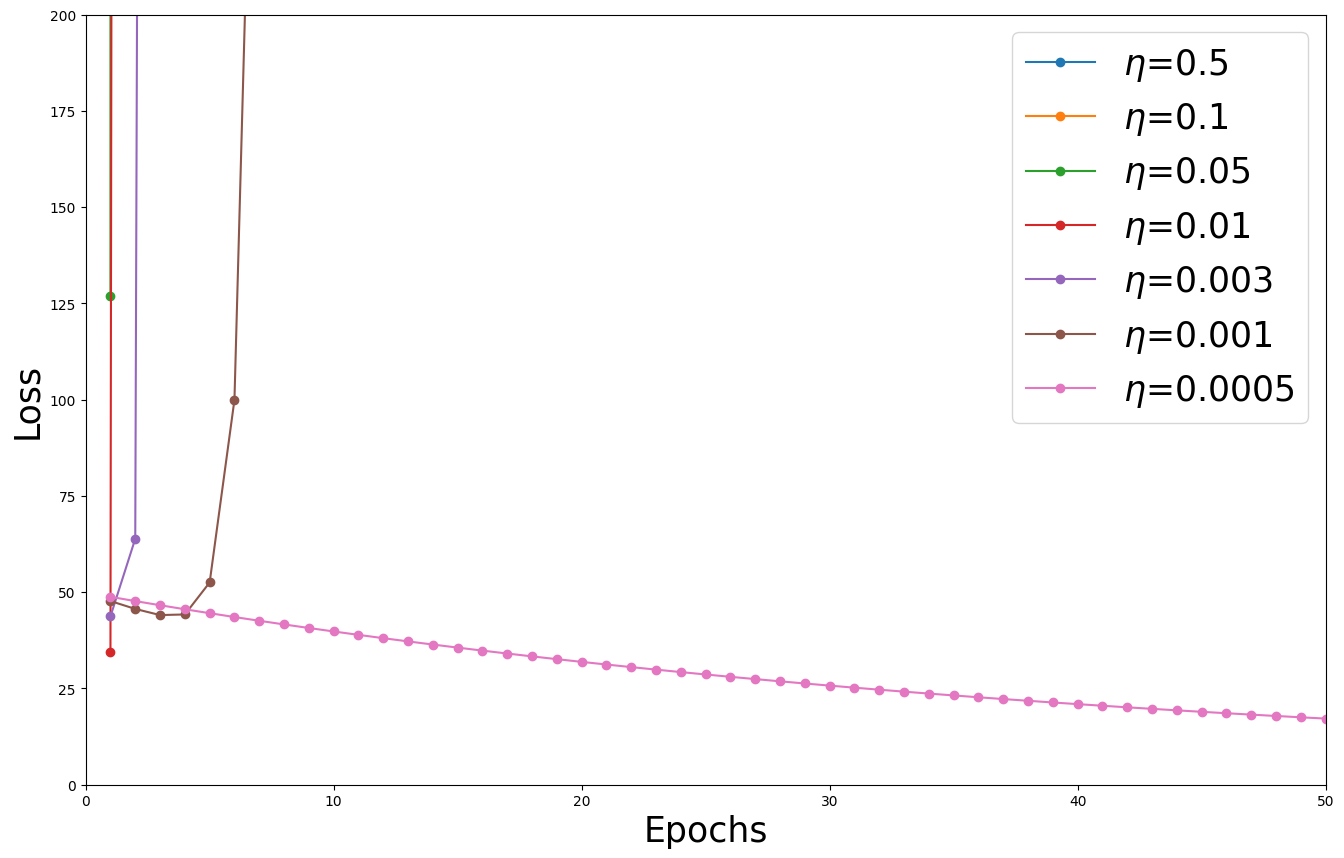

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

for eta in [0.5, 0.1, 0.05, 0.01, 0.003, 0.001, 0.0005]:
    ada_cls = Adaline(epochs=50, eta=eta, minibatches=1, random_seed=1).fit(X, y)
    ax.plot(range(1, 51), ada_cls.cost_, label = f'$\eta$={eta}', marker='o')

ax.set_ylim((0,200))
ax.set_xlim((0,50))
ax.set_xlabel('Epochs', size=25)
ax.set_ylabel('Loss', size=25)
ax.legend(fontsize = 25)

When we scale features, we observe that most of the cost function curves decrease and converge to the minimum loss.

Perceptron and adaline are very sensitive to feature scaling.

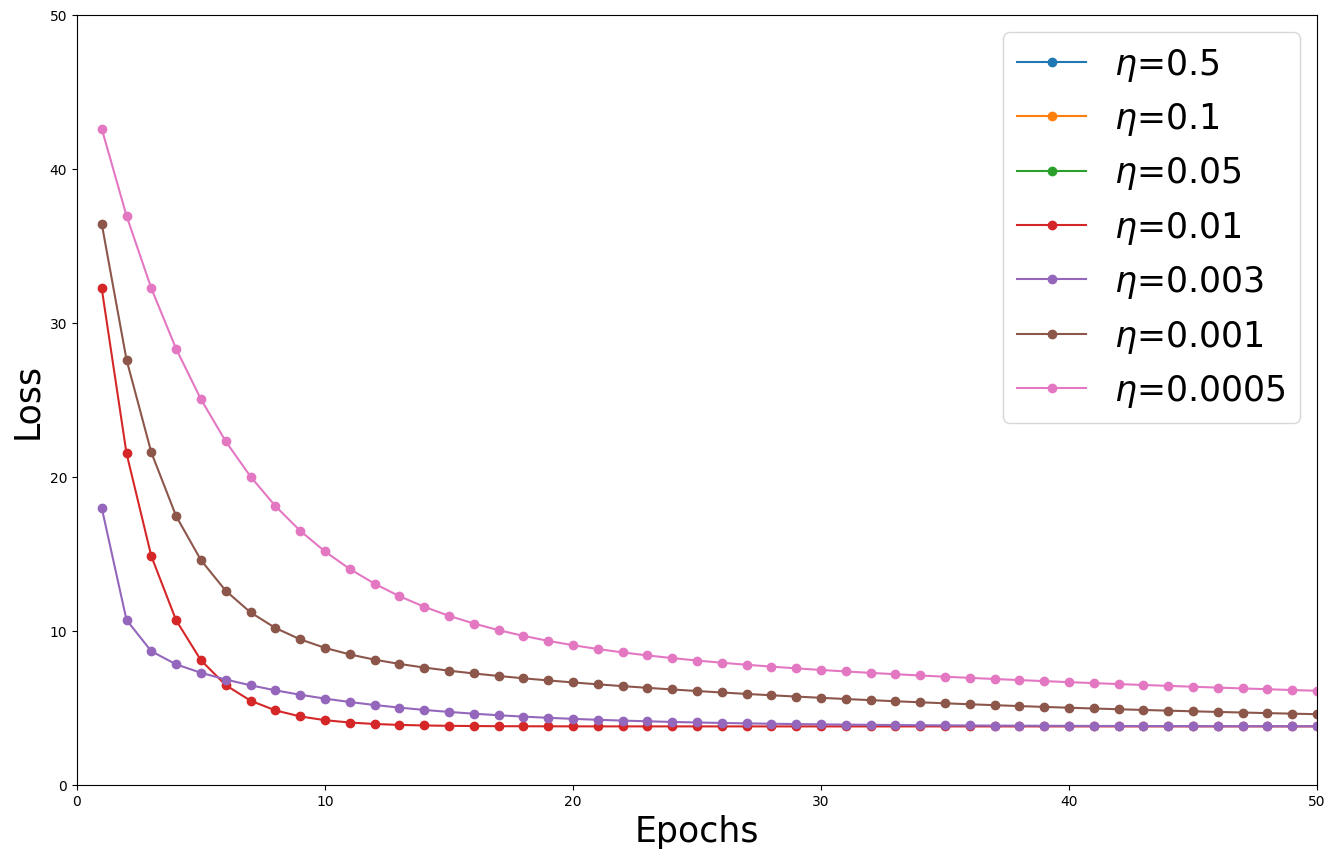

In [12]:
fig, ax = plt.subplots(figsize=(16,10))

for eta in [0.5, 0.1, 0.05, 0.01, 0.003, 0.001, 0.0005]:
    ada_cls = Adaline(epochs=50, eta=eta, minibatches=1, random_seed=1).fit(X_scaled, y)
    ax.plot(range(1, 51), ada_cls.cost_, label = f'$\eta$={eta}', marker='o')

ax.set_ylim((0,50))
ax.set_xlim((0,50))
ax.set_xlabel('Epochs', size=25)
ax.set_ylabel('Loss', size=25)
ax.legend(fontsize = 25)